# Salary Project

In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler

In [2]:
#importing the dataset
df = pd.read_csv(r"https://github.com/dsrscientist/dataset3/raw/main/Salaries.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [7]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [8]:
df.shape

(397, 6)

In [9]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [10]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

# Data Exploration:

In [11]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Correlation:

In [13]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

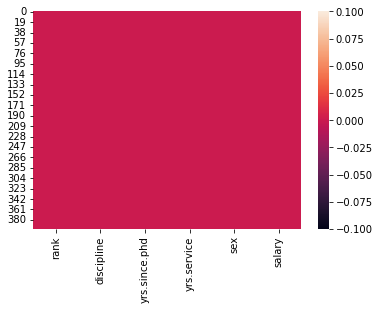

In [14]:
sns.heatmap(df.isnull())

<AxesSubplot:>

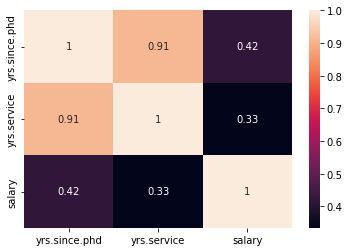

In [15]:
sns.heatmap(df.corr(),annot=True)

array([[<AxesSubplot:title={'center':'yrs.since.phd'}>,
        <AxesSubplot:title={'center':'yrs.service'}>]], dtype=object)

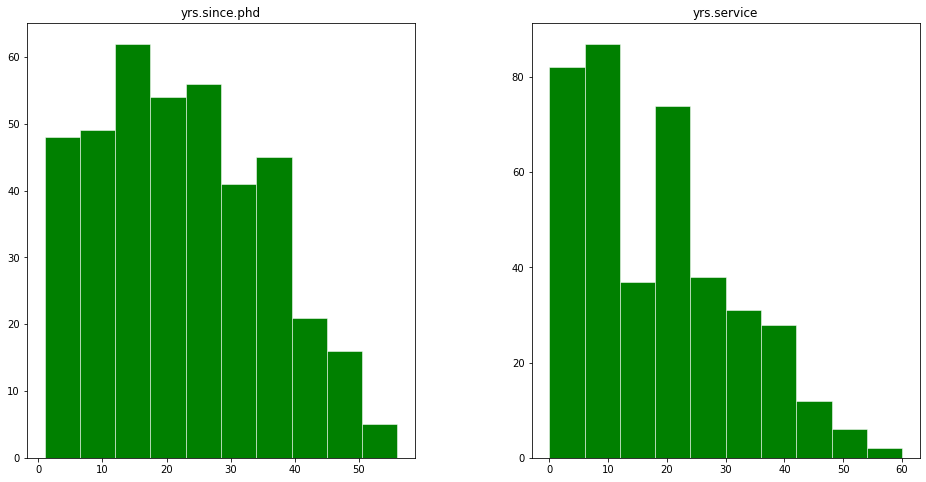

In [16]:
df.drop(['salary'],axis=1).hist(edgecolor='white', linewidth=0.5, figsize=(16,8), grid=False, color='green')

# Normal Distribution curve:

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

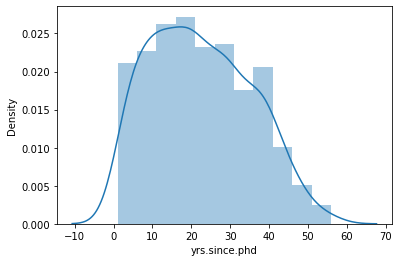

In [17]:
sns.distplot(df["yrs.since.phd"])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

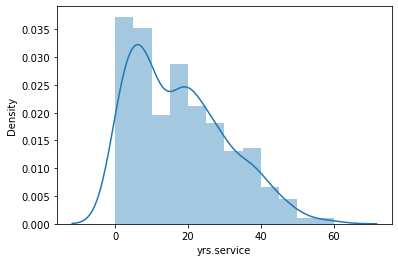

In [18]:
sns.distplot(df["yrs.service"])

<AxesSubplot:xlabel='salary', ylabel='Density'>

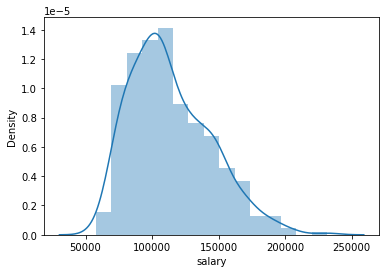

In [19]:
sns.distplot(df["salary"])

# Scatterplot:

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

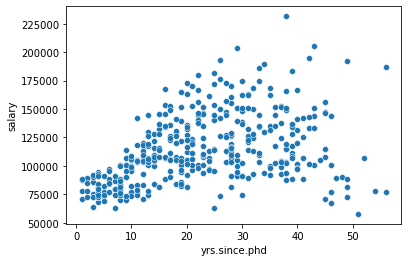

In [20]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

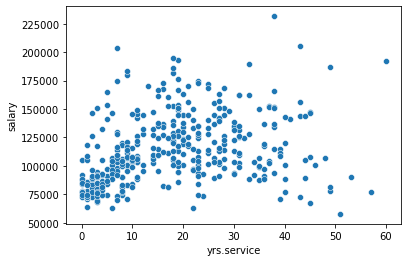

In [21]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

In [22]:
le = LabelEncoder()

list1 = ['rank','discipline','sex']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


# Outliers checking:

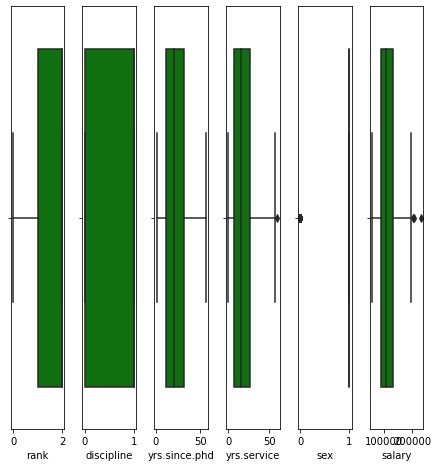

In [23]:
collist = df.columns.values
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

# Removing technique:

Z-Score technique

In [24]:
z=np.abs(zscore(df))
z.shape

(397, 6)

In [25]:
threshold = 3 
#index number
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [26]:
len(np.where(z>3)[0])

43

In [27]:
z.iloc[9]

rank             0.649257
discipline       0.915403
yrs.since.phd    0.335245
yrs.service      0.029669
sex              3.029767
salary           0.505557
Name: 9, dtype: float64

In [28]:
df_new = df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)
print("New DataFrame",df_new.shape)
print("total_dropped_rows",df.shape[0]-df_new.shape[0])

Old DataFrame (397, 6)
New DataFrame (354, 6)
total_dropped_rows 43


# Percentage of data loss:

In [29]:
loss_percent=(397-354)/397*100
print(loss_percent,'%')

10.831234256926953 %


# Skewness:

In [30]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

# Splitting the data:

In [31]:
x = df.drop(['salary'],axis=1)
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [32]:
y = df['salary']
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [33]:
x.shape

(397, 5)

In [34]:
y.shape

(397,)

# Transforming data to remove the skewness:

In [35]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.69005113,  0.91540317, -0.12729454,  0.25061906,  0.3300584 ],
       [ 0.69005113,  0.91540317, -0.04917821,  0.10511199,  0.3300584 ],
       [-1.09153554,  0.91540317, -1.62812069, -1.28803213,  0.3300584 ],
       ...,
       [ 0.69005113, -1.09241483,  1.39552477,  0.69878852,  0.3300584 ],
       [ 0.69005113, -1.09241483,  0.32017198,  0.02856739,  0.3300584 ],
       [-1.09153554, -1.09241483, -1.13497737, -1.12348349,  0.3300584 ]])

In [36]:
pd.DataFrame(x).skew()

0   -0.830409
1   -0.177684
2   -0.132757
3   -0.122152
4   -2.709958
dtype: float64

In [37]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.69005113,  0.91540317, -0.12729454,  0.25061906,  0.3300584 ],
       [ 0.69005113,  0.91540317, -0.04917821,  0.10511199,  0.3300584 ],
       [-1.09153554,  0.91540317, -1.62812069, -1.28803213,  0.3300584 ],
       ...,
       [ 0.69005113, -1.09241483,  1.39552477,  0.69878852,  0.3300584 ],
       [ 0.69005113, -1.09241483,  0.32017198,  0.02856739,  0.3300584 ],
       [-1.09153554, -1.09241483, -1.13497737, -1.12348349,  0.3300584 ]])

In [38]:
xf=pd.DataFrame(data=x)
xf

,0,1,2,3,4
0,0.690051,0.915403,-0.127295,0.250619,0.330058
1,0.690051,0.915403,-0.049178,0.105112,0.330058
2,-1.091536,0.915403,-1.628121,-1.288032,0.330058
3,0.690051,0.915403,1.565162,1.416860,0.330058
4,0.690051,0.915403,1.279680,1.506524,0.330058
...,...,...,...,...,...
392,0.690051,-1.092415,0.854260,0.976667,0.330058
393,0.690051,-1.092415,0.726155,0.320003,0.330058
394,0.690051,-1.092415,1.395525,0.698789,0.330058
395,0.690051,-1.092415,0.320172,0.028567,0.330058


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [40]:
x_train.shape

(317, 5)

In [41]:
y_train.shape

(317,)

In [42]:
x_test.shape

(80, 5)

In [43]:
y_test.shape

(80,)

In [44]:
lm = LinearRegression()

In [45]:
lm.fit(x_train,y_train)

LinearRegression()

In [46]:
lm.coef_

array([14115.26540079,  8334.94818766,  9058.35203026, -1888.89384285,
        1250.79446785])

In [47]:
lm.intercept_

113712.99956537435

In [48]:
print("Training Accuracy : ", lm.score(x_train, y_train))
print("Testing Accuracy : ", lm.score(x_test, y_test))

Training Accuracy :  0.45648880610197595
Testing Accuracy :  0.2641407563281938


In [49]:
#predict the value
pred = lm.predict(x_test)
print("Predicted result price:", pred)
print("actual price",y_test)

Predicted result price: [119697.32793745 119802.18352324  72727.56328534 118724.31325185
 122025.66560742  79555.34782608 129971.95791908 119909.26370676
  93060.7203166   79883.52386501  90914.08366311 128263.17929529
 134633.35779336  72232.2643599   75219.86330871 140242.05552864
 141671.32107449 116161.48403911 131314.72019549 136278.15875442
 117829.46399259  81765.23130199 117607.13833919 137337.63648336
 135290.86071898  77286.23238016  88717.16582783 134427.45856157
 122869.08035199  76766.64602609 112411.87568307 125767.95378285
 128717.20446781 140264.73900521 126323.4508628  119909.26370676
  91954.9223247  133039.25809041  93722.40957668 126928.63042576
 135753.95538424 127913.58413214  84265.88018767 115626.44480143
  97109.30327625  93240.75964021 124908.70599106 126192.1704357
 133862.02385863 139273.00533685  90329.12692484  69246.99053227
  79928.0334331  123407.34020114 116039.11469864 130888.67646012
 123940.01710194  95202.83481324  86315.2125283   74350.05301417
  

In [50]:
print('error: ')

print('Mean absolute error: ', mean_absolute_error(y_test,pred))
print('Mean squared error: ', mean_squared_error(y_test,pred))

print('Root Mean squared error: ', np.sqrt(mean_squared_error(y_test,pred)))

error: 
Mean absolute error:  20809.42005508514
Mean squared error:  772707610.5879762
Root Mean squared error:  27797.61879348618


In [51]:
print(r2_score(y_test,pred))

0.2641407563281938


In [52]:
def predicttest(testvalue):
    testvalue=testvalue.reshape(1,-1)
    t=lm.predict(testvalue)
    print(t)

In [53]:
testv = np.array([1.0,0.0,10.0,10.0,1.0])
predicttest(testv)

[200773.64130808]
